<a href="https://colab.research.google.com/github/samp3209/kaggleprojects/blob/main/GroTakeHomeExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [493]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr

In [494]:
#importing data
dp = pd.read_csv('Daily Precipitation.csv')
ds = pd.read_csv('Daily Soil Mositure.csv')
dt = pd.read_csv('Daily Temperature.csv')
ed = pd.read_csv('Eight Day NDVI.csv')
pq = pd.read_csv('Production Quantity.csv')
pp = pd.read_csv('predicted_production_qty.csv')


Data Exploration

In [495]:
#print(dp.sample(10))
print(dp['region_id'].value_counts())
print(len(dp))

93     2994
94     2994
95     2994
97     2994
98     2994
99     2994
102    2994
103    2994
104    2994
105    2994
Name: region_id, dtype: int64
29940


In [496]:
#getting time frame as a feature
dp['start_date']= pd.to_datetime(dp['start_date'])
dp['end_date']= pd.to_datetime(dp['end_date'])
dp.dtypes
dp['time_period'] = dp['end_date'] - dp['start_date']
dp.head(10)

,start_date,end_date,precip,region_id,time_period
0,2014-01-01 00:00:00+00:00,2014-01-01 00:00:00+00:00,1.392393,93,0 days
1,2014-01-02 00:00:00+00:00,2014-01-02 00:00:00+00:00,0.315380,93,0 days
2,2014-01-03 00:00:00+00:00,2014-01-03 00:00:00+00:00,2.347846,93,0 days
3,2014-01-04 00:00:00+00:00,2014-01-04 00:00:00+00:00,21.466357,93,0 days
4,2014-01-05 00:00:00+00:00,2014-01-05 00:00:00+00:00,32.823651,93,0 days
5,2014-01-06 00:00:00+00:00,2014-01-06 00:00:00+00:00,7.222263,93,0 days
6,2014-01-07 00:00:00+00:00,2014-01-07 00:00:00+00:00,0.450134,93,0 days
7,2014-01-08 00:00:00+00:00,2014-01-08 00:00:00+00:00,0.201830,93,0 days
8,2014-01-09 00:00:00+00:00,2014-01-09 00:00:00+00:00,6.424763,93,0 days
9,2014-01-10 00:00:00+00:00,2014-01-10 00:00:00+00:00,3.585208,93,0 days


In [497]:
#Target Variable. 
#Want to plot all variables with production to select features
#print(pq.sample(10))
print(pq['region_id'].value_counts())
print(len(pq))

93     72
94     72
95     72
97     72
98     72
99     72
102    72
103    72
104    72
105    72
Name: region_id, dtype: int64
720


In [498]:
#getting time frame as a feature
pq['start_date']= pd.to_datetime(pq['start_date'])
pq['end_date']= pd.to_datetime(pq['end_date'])
pq.dtypes
pq['time_period'] = pq['end_date'] - pq['start_date']
pq.head(10)

,start_date,end_date,prod,region_id,time_period
0,2015-01-01 00:00:00+00:00,2015-01-31 00:00:00+00:00,171725,93,30 days
1,2015-02-01 00:00:00+00:00,2015-02-28 00:00:00+00:00,188325,93,27 days
2,2015-03-01 00:00:00+00:00,2015-03-31 00:00:00+00:00,247856,93,30 days
3,2015-04-01 00:00:00+00:00,2015-04-30 00:00:00+00:00,282791,93,29 days
4,2015-05-01 00:00:00+00:00,2015-05-31 00:00:00+00:00,291057,93,30 days
5,2015-06-01 00:00:00+00:00,2015-06-30 00:00:00+00:00,287502,93,29 days
6,2015-07-01 00:00:00+00:00,2015-07-31 00:00:00+00:00,288086,93,30 days
7,2015-08-01 00:00:00+00:00,2015-08-31 00:00:00+00:00,313321,93,30 days
8,2015-09-01 00:00:00+00:00,2015-09-30 00:00:00+00:00,299337,93,29 days
9,2015-10-01 00:00:00+00:00,2015-10-31 00:00:00+00:00,300383,93,30 days


In [499]:
#print(ds.sample(10))
print(ds['region_id'].value_counts())
print(len(ds))

103    2975
93     2974
102    2970
104    2970
97     2969
98     2969
95     2968
99     2967
94     2963
105    2878
Name: region_id, dtype: int64
29603


In [500]:
#getting time frame as a feature
ds['start_date']= pd.to_datetime(ds['start_date'])
ds['end_date']= pd.to_datetime(ds['end_date'])
ds.dtypes
ds['time_period'] = ds['end_date'] - ds['start_date']
ds.head(10)

,start_date,end_date,smos,region_id,time_period
0,2014-01-01 00:00:00+00:00,2014-01-01 00:00:00+00:00,0.310787,93,0 days
1,2014-01-02 00:00:00+00:00,2014-01-02 00:00:00+00:00,0.192271,93,0 days
2,2014-01-03 00:00:00+00:00,2014-01-03 00:00:00+00:00,0.265683,93,0 days
3,2014-01-04 00:00:00+00:00,2014-01-04 00:00:00+00:00,0.265683,93,0 days
4,2014-01-05 00:00:00+00:00,2014-01-05 00:00:00+00:00,0.230782,93,0 days
5,2014-01-06 00:00:00+00:00,2014-01-06 00:00:00+00:00,0.379118,93,0 days
6,2014-01-07 00:00:00+00:00,2014-01-07 00:00:00+00:00,0.379118,93,0 days
7,2014-01-08 00:00:00+00:00,2014-01-08 00:00:00+00:00,0.308168,93,0 days
8,2014-01-09 00:00:00+00:00,2014-01-09 00:00:00+00:00,0.308168,93,0 days
9,2014-01-10 00:00:00+00:00,2014-01-10 00:00:00+00:00,0.220793,93,0 days


In [501]:
#print(dt.sample(10))
print(dt['region_id'].value_counts())
print(len(dt))

102    1577
99     1555
103    1419
94     1354
95     1283
98     1276
105    1262
104    1140
93     1053
97     1011
Name: region_id, dtype: int64
12930


In [502]:
#getting time frame as a feature
dt['start_date']= pd.to_datetime(dt['start_date'])
dt['end_date']= pd.to_datetime(dt['end_date'])
dt.dtypes
dt['time_period'] = dt['end_date'] - dt['start_date']
dt.head(10)

,start_date,end_date,temp,region_id,time_period
0,2014-01-02 00:00:00+00:00,2014-01-02 00:00:00+00:00,24.707605,93,0 days
1,2014-01-11 00:00:00+00:00,2014-01-11 00:00:00+00:00,26.421176,93,0 days
2,2014-01-15 00:00:00+00:00,2014-01-15 00:00:00+00:00,24.305642,93,0 days
3,2014-01-20 00:00:00+00:00,2014-01-20 00:00:00+00:00,25.142744,93,0 days
4,2014-01-23 00:00:00+00:00,2014-01-23 00:00:00+00:00,23.653173,93,0 days
5,2014-01-24 00:00:00+00:00,2014-01-24 00:00:00+00:00,23.754308,93,0 days
6,2014-01-25 00:00:00+00:00,2014-01-25 00:00:00+00:00,24.396083,93,0 days
7,2014-01-26 00:00:00+00:00,2014-01-26 00:00:00+00:00,24.274063,93,0 days
8,2014-01-27 00:00:00+00:00,2014-01-27 00:00:00+00:00,27.065031,93,0 days
9,2014-01-29 00:00:00+00:00,2014-01-29 00:00:00+00:00,27.971727,93,0 days


In [503]:
#print(ed.sample(10))
print(ed['region_id'].value_counts())
print(len(ed))

102    363
99     361
103    353
94     340
98     333
95     332
93     320
97     319
105    310
104    307
Name: region_id, dtype: int64
3338


In [504]:
#getting time frame as a feature
ed['start_date']= pd.to_datetime(ed['start_date'])
ed['end_date']= pd.to_datetime(ed['end_date'])
ed.dtypes
ed['time_period'] = ed['end_date'] - ed['start_date']
ed.head(10)

,start_date,end_date,ndvi,region_id,time_period
0,2013-12-27 00:00:00+00:00,2014-01-03 00:00:00+00:00,0.679106,93,7 days
1,2014-01-01 00:00:00+00:00,2014-01-08 00:00:00+00:00,0.701431,93,7 days
2,2014-01-09 00:00:00+00:00,2014-01-16 00:00:00+00:00,0.745149,93,7 days
3,2014-01-17 00:00:00+00:00,2014-01-24 00:00:00+00:00,0.747391,93,7 days
4,2014-01-25 00:00:00+00:00,2014-02-01 00:00:00+00:00,0.768325,93,7 days
5,2014-02-02 00:00:00+00:00,2014-02-09 00:00:00+00:00,0.757172,93,7 days
6,2014-02-10 00:00:00+00:00,2014-02-17 00:00:00+00:00,0.779810,93,7 days
7,2014-02-18 00:00:00+00:00,2014-02-25 00:00:00+00:00,0.765280,93,7 days
8,2014-02-26 00:00:00+00:00,2014-03-05 00:00:00+00:00,0.761799,93,7 days
9,2014-03-06 00:00:00+00:00,2014-03-13 00:00:00+00:00,0.722182,93,7 days


In [505]:
#print(pp.sample(10))
print(pp['region_id'].value_counts())
print(len(pp))

93     12
94     12
95     12
97     12
98     12
99     12
102    12
103    12
104    12
105    12
Name: region_id, dtype: int64
120


In [506]:
#getting time frame as a feature
pp['start_date']= pd.to_datetime(pp['start_date'])
pp['end_date']= pd.to_datetime(pp['end_date'])
pp.dtypes
#pp['time_period'] = pp['end_date'] - pp['start_date']
pp.head(10)

,start_date,end_date,prod,region_id
0,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,NaN,93
1,2021-02-01 00:00:00+00:00,2021-02-28 00:00:00+00:00,NaN,93
2,2021-03-01 00:00:00+00:00,2021-03-31 00:00:00+00:00,NaN,93
3,2021-04-01 00:00:00+00:00,2021-04-30 00:00:00+00:00,NaN,93
4,2021-05-01 00:00:00+00:00,2021-05-31 00:00:00+00:00,NaN,93
5,2021-06-01 00:00:00+00:00,2021-06-30 00:00:00+00:00,NaN,93
6,2021-07-01 00:00:00+00:00,2021-07-31 00:00:00+00:00,NaN,93
7,2021-08-01 00:00:00+00:00,2021-08-31 00:00:00+00:00,NaN,93
8,2021-09-01 00:00:00+00:00,2021-09-30 00:00:00+00:00,NaN,93
9,2021-10-01 00:00:00+00:00,2021-10-31 00:00:00+00:00,NaN,93


Plotting out the target variable against features within its own data set

                 start_date                  end_date    prod  region_id  \
0 2015-01-01 00:00:00+00:00 2015-01-31 00:00:00+00:00  171725         93   
1 2015-02-01 00:00:00+00:00 2015-02-28 00:00:00+00:00  188325         93   
2 2015-03-01 00:00:00+00:00 2015-03-31 00:00:00+00:00  247856         93   
3 2015-04-01 00:00:00+00:00 2015-04-30 00:00:00+00:00  282791         93   
4 2015-05-01 00:00:00+00:00 2015-05-31 00:00:00+00:00  291057         93   
5 2015-06-01 00:00:00+00:00 2015-06-30 00:00:00+00:00  287502         93   
6 2015-07-01 00:00:00+00:00 2015-07-31 00:00:00+00:00  288086         93   
7 2015-08-01 00:00:00+00:00 2015-08-31 00:00:00+00:00  313321         93   
8 2015-09-01 00:00:00+00:00 2015-09-30 00:00:00+00:00  299337         93   
9 2015-10-01 00:00:00+00:00 2015-10-31 00:00:00+00:00  300383         93   

  time_period  
0     30 days  
1     27 days  
2     30 days  
3     29 days  
4     30 days  
5     29 days  
6     30 days  
7     30 days  
8     29 days  
9  

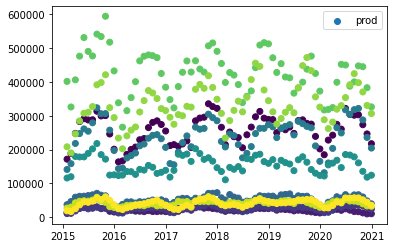

In [507]:
print(pq.head(10))
plt.scatter('end_date', 'prod', c='region_id', data=pq )
plt.legend()


In [508]:
pqregion = pq.groupby(['region_id'])['prod'].mean()

In [509]:
#************************
#important series of region and total production
pqregion.sort_values()

region_id
94      21809.069444
95      25608.611111
104     41741.152778
105     41961.694444
97      54652.666667
99     155615.208333
98     236046.638889
93     255817.361111
103    331758.166667
102    425131.444444
Name: prod, dtype: float64

<BarContainer object of 10 artists>

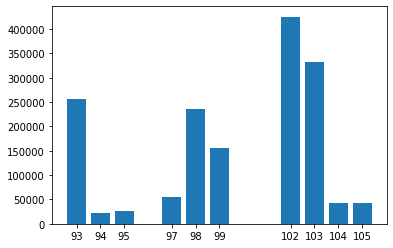

In [510]:
#************************************************
#Important graph of 
plt.bar(pqregion.index, pqregion.values, tick_label=pqregion.index)


In [511]:
pqtime = pq.groupby(['time_period'])['prod'].sum()
pqtime.sort_values()

time_period
28 days     2302927
27 days     5208726
29 days    39599499
30 days    67379073
Name: prod, dtype: int64

Exploring the other data sets against production for feature selection

In [512]:
dpregmean = dp.groupby(['region_id'])['precip'].mean()
dpregsum = dp.groupby(['region_id'])['precip'].sum()

<BarContainer object of 10 artists>

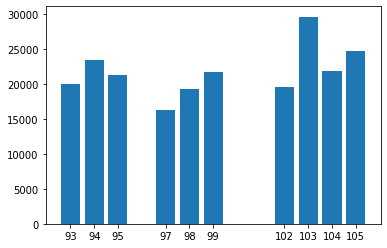

In [513]:
plt.bar(dpregsum.index, dpregsum.values, tick_label=dpregsum.index)

<BarContainer object of 10 artists>

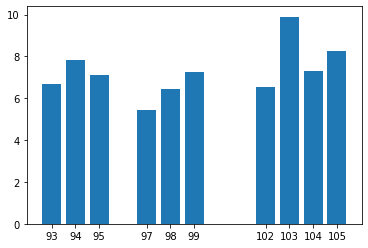

In [514]:
plt.bar(dpregmean.index, dpregmean.values, tick_label=dpregmean.index)


region 103 which is the second highest producing region is the highest precip region by far which would be good if 102 was also high precipitation region but its second to lowest. 


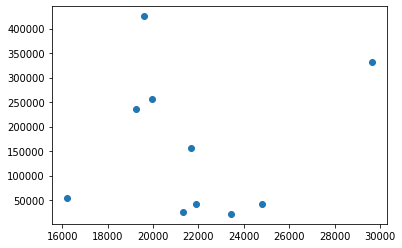

In [515]:
plt.scatter(dpregsum.values, pqregion.values)

In [516]:
corr, _  = pearsonr(dpregsum.values, pqregion.values)
print('Pearsons correlation: ', corr)


Pearsons correlation:  0.09611396599782684


In [517]:
from scipy.stats import spearmanr
corr, _ = spearmanr(dpregsum.values, pqregion.values)
print('Spearmans correlation:',corr)

Spearmans correlation: -0.24848484848484845


Now examining daily soil moisture

In [518]:
ds.head(10)
dssum = ds.groupby(['region_id'])['smos'].sum()
dssum.sort_values()

region_id
98     602.719708
105    649.676632
102    652.366061
95     739.406773
103    751.265293
97     766.120221
99     835.282816
104    959.630825
93     965.158938
94     967.335404
Name: smos, dtype: float64

<BarContainer object of 10 artists>

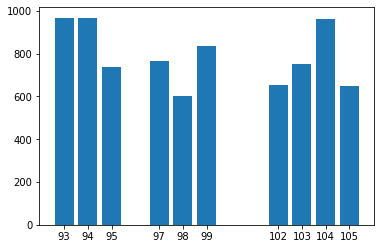

In [519]:
plt.bar(dssum.index, dssum.values, tick_label=dssum.index)

In [520]:
corr, _  = pearsonr(dssum.values, pqregion.values)
print('Pearsons correlation: ', corr)

Pearsons correlation:  -0.32901402903819527


In [521]:
corr, _ = spearmanr(dssum.values, pqregion.values)
print('Spearmans correlation:',corr)

Spearmans correlation: -0.32121212121212117


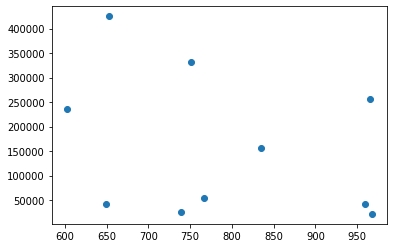

In [522]:
plt.scatter(dssum.values, pqregion.values)

Nothing has stuck out to me yet with using the sum/mean so I might try some other feature engineering if the other data isnt showing a bigger trend 

---



In [523]:
dt.head(10)
dtmean = dt.groupby(['region_id'])['temp'].mean()
dtmean.sort_values()

region_id
103    25.358630
102    25.573277
99     26.171634
95     26.204371
105    26.298263
98     26.336592
93     27.316129
97     27.388909
94     27.688734
104    27.913997
Name: temp, dtype: float64

<BarContainer object of 10 artists>

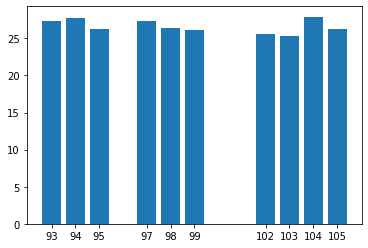

In [524]:
plt.bar(dtmean.index, dtmean.values, tick_label=dtmean.index)

In [525]:
corr, _  = pearsonr(dtmean.values, pqregion.values)
print('Pearsons correlation: ', corr)

Pearsons correlation:  -0.6295464481173716


In [526]:
corr, _ = spearmanr(dtmean.values, pqregion.values)
print('Spearmans correlation:',corr)

Spearmans correlation: -0.6121212121212121


Pretty good negative correlation will probably use temperature in my model

In [527]:
ed.head(10)
edmean = ed.groupby(['region_id'])['ndvi'].mean()
edmean.sort_values()

region_id
104    0.765984
94     0.773838
95     0.789353
105    0.795175
93     0.796895
97     0.797483
99     0.806068
98     0.809874
103    0.818875
102    0.824189
Name: ndvi, dtype: float64

In [528]:
corr, _  = pearsonr(edmean.values, pqregion.values)
print('Pearsons correlation: ', corr)

Pearsons correlation:  0.8313170299155294


In [529]:
corr, _ = spearmanr(edmean.values, pqregion.values)
print('Spearmans correlation:',corr)

Spearmans correlation: 0.8909090909090909


Very strong correlation with eight day

Feature selection completed. Moving onto model building and selection

<BarContainer object of 720 artists>

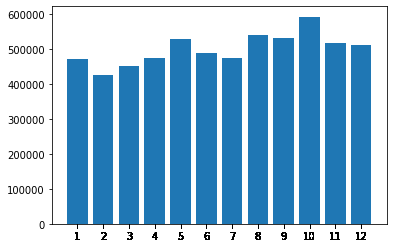

In [530]:
#Realized I needed to add month column for final data set so im adding that feature to my data sets
pq['month'] = pq['start_date'].dt.month
pq.head(10)
ed['month'] = ed['start_date'].dt.month
ed.head(10)
dt['month'] = dt['start_date'].dt.month
ds['month'] = ds['start_date'].dt.month
plt.bar(pq['month'], pq['prod'], tick_label=pq['month'])

<BarContainer object of 3338 artists>

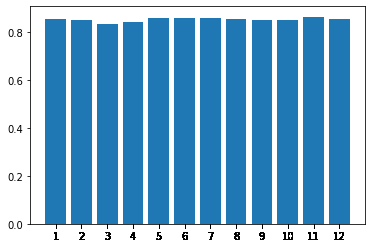

In [531]:
plt.bar(ed['month'], ed['ndvi'], tick_label=ed['month'])

In [532]:
#sampling the dt data to get data of same length 
print(len(ed))
print(len(dt))
print(len(pq))
edsample = ed.sample(720)
dtsample = dt.sample(720)
#eddt = ed.merge(dt)
#edsample
all_data = pd.concat([edsample, dtsample], axis=1)
dpsample = dp.sample(720)
all_data.sample(720)
all_data['temp'] = all_data['temp'].fillna(0)
all_data['ndvi'] = all_data['ndvi'].fillna(1)
edsample


3338
12930
720


,start_date,end_date,ndvi,region_id,time_period,month
2079,2015-08-29 00:00:00+00:00,2015-09-05 00:00:00+00:00,0.814172,102,7 days,8
1271,2021-03-06 00:00:00+00:00,2021-03-13 00:00:00+00:00,0.790989,97,7 days,3
2657,2020-08-20 00:00:00+00:00,2020-08-27 00:00:00+00:00,0.841710,103,7 days,8
1684,2014-11-09 00:00:00+00:00,2014-11-16 00:00:00+00:00,0.792350,99,7 days,11
1015,2014-07-04 00:00:00+00:00,2014-07-11 00:00:00+00:00,0.778267,97,7 days,7
...,...,...,...,...,...,...
2864,2017-08-29 00:00:00+00:00,2017-09-05 00:00:00+00:00,0.758733,104,7 days,8
483,2017-11-17 00:00:00+00:00,2017-11-24 00:00:00+00:00,0.782776,94,7 days,11
2236,2019-03-14 00:00:00+00:00,2019-03-21 00:00:00+00:00,0.818645,102,7 days,3
2573,2018-10-16 00:00:00+00:00,2018-10-23 00:00:00+00:00,0.806370,103,7 days,10


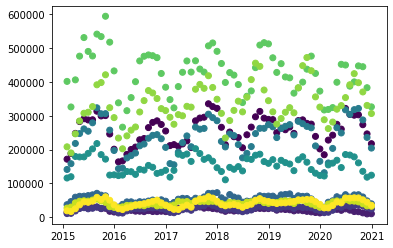

In [534]:
plt.scatter('end_date', 'prod', c='region_id', data=pq )


In [535]:
pqregion.sort_values()
pqregion.to_frame()

,prod
region_id,
93,255817.361111
94,21809.069444
95,25608.611111
97,54652.666667
98,236046.638889
99,155615.208333
102,425131.444444
103,331758.166667
104,41741.152778


In [536]:
dtmean = dt.groupby(['region_id'])['temp'].mean()
dtmean.to_frame()

,temp
region_id,
93,27.316129
94,27.688734
95,26.204371
97,27.388909
98,26.336592
99,26.171634
102,25.573277
103,25.358630
104,27.913997


In [537]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [538]:
edmean.values
edmean.to_frame()
data = pd.merge(edmean, pqregion, on='region_id', how='outer')
data = pd.merge(data, dtmean, on='region_id', how='outer')
data.reset_index(inplace=True)
data

,region_id,ndvi,prod,temp
0,93,0.796895,255817.361111,27.316129
1,94,0.773838,21809.069444,27.688734
2,95,0.789353,25608.611111,26.204371
3,97,0.797483,54652.666667,27.388909
4,98,0.809874,236046.638889,26.336592
5,99,0.806068,155615.208333,26.171634
6,102,0.824189,425131.444444,25.573277
7,103,0.818875,331758.166667,25.358630
8,104,0.765984,41741.152778,27.913997
9,105,0.795175,41961.694444,26.298263


In [556]:
pq['prod'] = np.log2(pq['prod'])
edsample['']

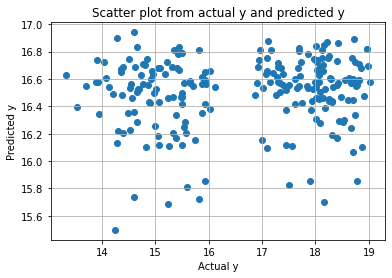

Mean Absolute percentage Error : 0.08961217347004122
Mean Absolute Error : 1.472116397814166


In [567]:
from sklearn.metrics import mean_absolute_percentage_error
#Target 
Y = pq['prod']
#features
X = edsample[['ndvi']]
#X = all_data.sample(720)
#X = data[['region_id',  'ndvi']]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
#x_train= x_train.reshape(-1, 1)
#y_train= y_train.reshape(-1, 1)
#x_test = x_test.reshape(-1, 1)
x_test=np.array(x_test)
y_test=np.array(y_test)

#SGD Regressor
n_iter=1000
clf_ = SGDRegressor(max_iter=n_iter)
#clf = KNeighborsRegressor()
#clf = LinearRegression()
clf_.fit(x_train.values, y_train.values)

y_pred_sksgd=clf_.predict(x_test)
plt.scatter(y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(y_test, y_pred_sksgd))
#print(y_test)
#print(y_pred_sksgd)

In [540]:
clf = KNeighborsRegressor()
cv = cross_val_score(clf,x_train,y_train,cv=3, scoring="accuracy")
print(cv)
print(cv.mean())

[nan nan nan]
nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check

In [541]:
pp

,start_date,end_date,prod,region_id
0,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,NaN,93
1,2021-02-01 00:00:00+00:00,2021-02-28 00:00:00+00:00,NaN,93
2,2021-03-01 00:00:00+00:00,2021-03-31 00:00:00+00:00,NaN,93
3,2021-04-01 00:00:00+00:00,2021-04-30 00:00:00+00:00,NaN,93
4,2021-05-01 00:00:00+00:00,2021-05-31 00:00:00+00:00,NaN,93
...,...,...,...,...
115,2021-08-01 00:00:00+00:00,2021-08-31 00:00:00+00:00,NaN,105
116,2021-09-01 00:00:00+00:00,2021-09-30 00:00:00+00:00,NaN,105
117,2021-10-01 00:00:00+00:00,2021-10-31 00:00:00+00:00,NaN,105
118,2021-11-01 00:00:00+00:00,2021-11-30 00:00:00+00:00,NaN,105


In [542]:
pq

,start_date,end_date,prod,region_id,time_period,month
0,2015-01-01 00:00:00+00:00,2015-01-31 00:00:00+00:00,171725,93,30 days,1
1,2015-02-01 00:00:00+00:00,2015-02-28 00:00:00+00:00,188325,93,27 days,2
2,2015-03-01 00:00:00+00:00,2015-03-31 00:00:00+00:00,247856,93,30 days,3
3,2015-04-01 00:00:00+00:00,2015-04-30 00:00:00+00:00,282791,93,29 days,4
4,2015-05-01 00:00:00+00:00,2015-05-31 00:00:00+00:00,291057,93,30 days,5
...,...,...,...,...,...,...
715,2020-08-01 00:00:00+00:00,2020-08-31 00:00:00+00:00,57818,105,30 days,8
716,2020-09-01 00:00:00+00:00,2020-09-30 00:00:00+00:00,57474,105,29 days,9
717,2020-10-01 00:00:00+00:00,2020-10-31 00:00:00+00:00,51821,105,30 days,10
718,2020-11-01 00:00:00+00:00,2020-11-30 00:00:00+00:00,44947,105,29 days,11
